In [145]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer, util


In [146]:
df = pd.read_csv("egitim_verisi.csv") # burdan eğitim verisi değiştirilebilir
df.head()

,CategoryName,GeneralCategory
0,Alternatif Muzik,Music
1,Ascilik Ve Mutfak,Food & Drink
2,Bilim Teknoloji,Technology
3,Bilisim,Technology
4,Caz Muzik,Music


In [147]:
X = df["CategoryName"]
y = df["GeneralCategory"]

In [148]:
model = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens") # Çok dilli, BERT tabanlı. Daha büyük ve güçlü.
X_embed = model.encode(X.tolist())

X_train, X_test, y_train, y_test = train_test_split(X_embed, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_embed, y)

LogisticRegression(max_iter=1000, random_state=42)

In [149]:
y_pred = clf.predict(X_test)

In [150]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.94


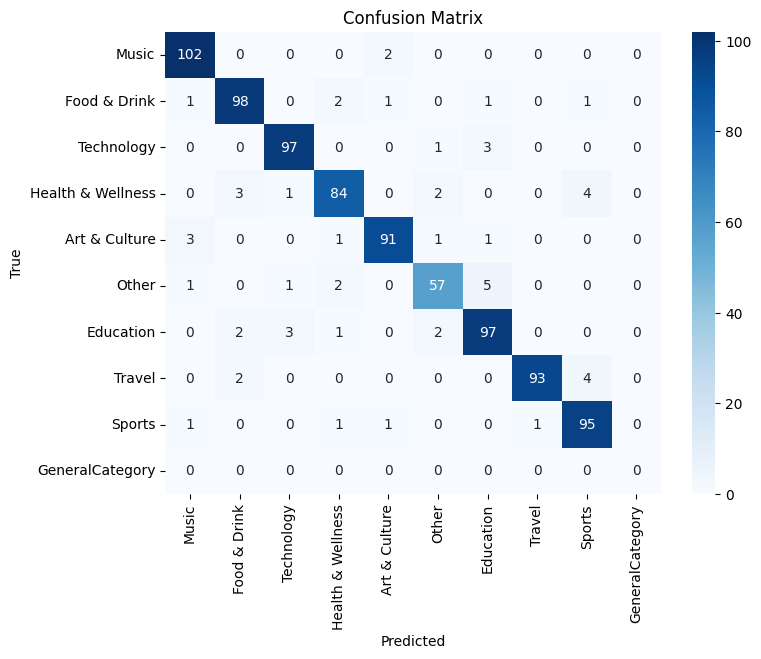

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=df["GeneralCategory"].unique())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df["GeneralCategory"].unique(), yticklabels=df["GeneralCategory"].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [152]:
import joblib
joblib.dump(clf, "model.pkl")

['model.pkl']

In [153]:
import pandas as pd

# CSV dosyasını oku
df = pd.read_csv("egitim_verisi.csv")

# Her bir GeneralCategory'nin kaç kez geçtiğini say
kategori_sayilari = df["GeneralCategory"].value_counts()

# Sonucu yazdır
print(kategori_sayilari)

GeneralCategory
Health & Wellness    530
Education            523
Music                514
Travel               509
Technology           500
Food & Drink         486
Sports               485
Art & Culture        464
Other                333
GeneralCategory        1
Name: count, dtype: int64
